# Chapter 12: Discriminant Analysis

> (c) 2019 Galit Shmueli, Peter C. Bruce, Peter Gedeck 
>
> Code included in
>
> _Data Mining for Business Analytics: Concepts, Techniques, and Applications in Python_ (First Edition) 
> Galit Shmueli, Peter C. Bruce, Peter Gedeck, and Nitin R. Patel. 2019.

## Import required packages

Make sure DMBA package is available

In [1]:
pip install dmba


[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
from pathlib import Path

import numpy as np
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pylab as plt

import dmba
from dmba import classificationSummary

%matplotlib inline

FIGURES = Path('.').resolve().parent / 'figures' / 'chapter_12'
FIGURES.mkdir(exist_ok=True, parents=True)

no display found. Using non-interactive Agg backend


## Table 12.1

In [3]:
mower_df = dmba.load_data('RidingMowers.csv')

da_reg = LinearDiscriminantAnalysis()
da_reg.fit(mower_df.drop(columns=['Ownership']), mower_df['Ownership'])

c_income = da_reg.coef_[0, 0]
c_lotSize = da_reg.coef_[0, 1]
intercept = da_reg.intercept_[0]
print('Coefficients', da_reg.coef_)
print('Intercept', da_reg.intercept_)

print('Decision function')
print(' = {:.2f}*Income + {:.2f}*Lot_Size + {:.2f}'.format(c_income, c_lotSize, intercept))

print('\nExample Income=$60K Lot_Size=18.4Kft2')
print('  {:.2f}*60 + {:.2f}*18.4 + {:.2f} = {:.2f}'.format(c_income, c_lotSize, intercept,
                                                          da_reg.decision_function([[60, 18.4]])[0]))
print('  negative => nonowner')

Coefficients [[0.1002303  0.78518471]]
Intercept [-21.73876167]
Decision function
 = 0.10*Income + 0.79*Lot_Size + -21.74

Example Income=$60K Lot_Size=18.4Kft2
  0.10*60 + 0.79*18.4 + -21.74 = -1.28
  negative => nonowner


/usr/local/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


In [4]:
mower_df
da_reg.coef_
da_reg.intercept_

array([-21.73876167])

## Figure 12.1 and Figure 12.3

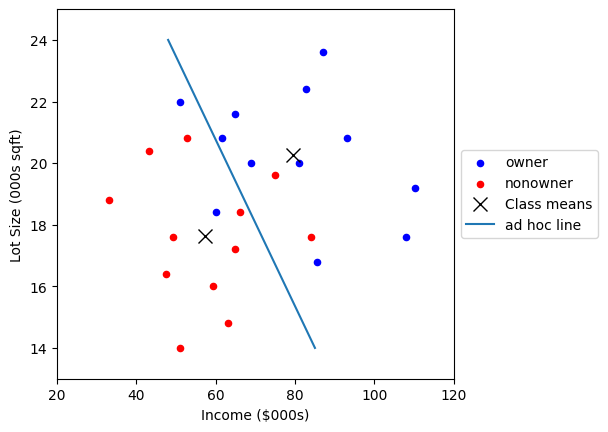

In [5]:
ax = mower_df[mower_df.Ownership=='Owner'].plot.scatter(x='Income', y='Lot_Size', c='blue', label='owner')
mower_df[mower_df.Ownership!='Owner'].plot.scatter(x='Income', y='Lot_Size', c='red', label='nonowner', ax=ax)

ax.plot(da_reg.means_[:,0], da_reg.means_[:,1], 'x', color='black', label='Class means', markersize=10)
x_adhoc = np.array([48, 85])
y_adhoc = np.array([24, 14])
ax.plot(x_adhoc, y_adhoc, '-', color='C0', label='ad hoc line')
ax.set_xlabel('Income ($000s)')
ax.set_ylabel('Lot Size (000s sqft)')
ax.set_xlim(20, 120)
ax.set_ylim(13, 25)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig(str(FIGURES / 'adhoc.pdf'))
plt.show()

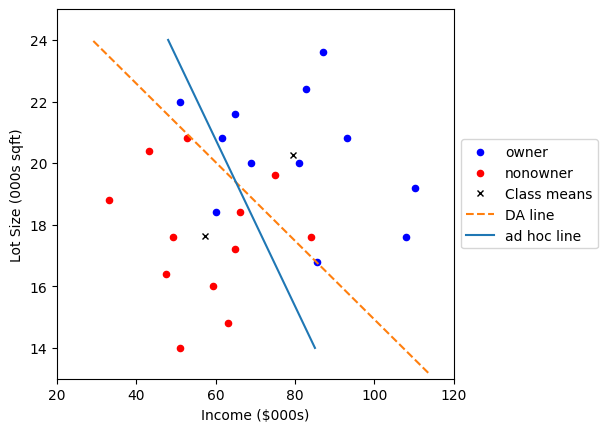

In [6]:
ax = mower_df[mower_df.Ownership=='Owner'].plot.scatter(x='Income', y='Lot_Size', c='blue', label='owner')
mower_df[mower_df.Ownership!='Owner'].plot.scatter(x='Income', y='Lot_Size', c='red', label='nonowner', ax=ax)

ax.plot(da_reg.means_[:,0], da_reg.means_[:,1], 'x', color='black', label='Class means', markersize=5)
x_lda = np.array(ax.get_xlim())
y_lda = (- intercept - c_income * x_lda) / c_lotSize
ax.plot(x_lda, y_lda, '--', color='C1', label='DA line')
ax.plot(x_adhoc, y_adhoc, '-', color='C0', label='ad hoc line')
ax.set_xlabel('Income ($000s)')
ax.set_ylabel('Lot Size (000s sqft)')
ax.set_xlim(20, 120)
ax.set_ylim(13, 25)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig(str(FIGURES / 'LDA_adhoc.pdf'))
plt.show()

## Table 12.2

In [7]:
da_reg = LinearDiscriminantAnalysis()
da_reg.fit(mower_df.drop(columns=['Ownership']), mower_df['Ownership'])

result_df = mower_df.copy()
result_df.index = result_df.index + 1
result_df['Dec. Function'] = da_reg.decision_function(mower_df.drop(columns=['Ownership']))
result_df['Prediction'] = da_reg.predict(mower_df.drop(columns=['Ownership']))
result_df['p(Owner)'] = da_reg.predict_proba(mower_df.drop(columns=['Ownership']))[:, 1]

print(result_df)

    Income  Lot_Size Ownership  Dec. Function Prediction  p(Owner)
1     60.0      18.4     Owner      -1.277545   Nonowner  0.217968
2     85.5      16.8     Owner       0.022032      Owner  0.505508
3     64.8      21.6     Owner       1.716152      Owner  0.847632
4     61.5      20.8     Owner       0.757244      Owner  0.680755
5     87.0      23.6     Owner       5.511634      Owner  0.995977
6    110.1      19.2     Owner       4.372141      Owner  0.987533
7    108.0      17.6     Owner       2.905362      Owner  0.948111
8     82.8      22.4     Owner       4.148445      Owner  0.984456
9     69.0      20.0     Owner       0.880823      Owner  0.706993
10    93.0      20.8     Owner       3.914499      Owner  0.980440
11    51.0      22.0     Owner       0.647047      Owner  0.656345
12    81.0      20.0     Owner       2.083587      Owner  0.889298
13    75.0      19.6  Nonowner       1.168131      Owner  0.762807
14    52.8      20.8  Nonowner      -0.114760   Nonowner  0.47

## Table 12.3

In [8]:
accidents_df = dmba.load_data('accidents.csv')
lda_reg = LinearDiscriminantAnalysis()
lda_reg.fit(accidents_df.drop(columns=['MAX_SEV']), accidents_df['MAX_SEV'])

print('Coefficients and intercept')
fct = pd.concat([
    pd.DataFrame([lda_reg.intercept_], columns=lda_reg.classes_, index=['constant']),
    pd.DataFrame(lda_reg.coef_.transpose(), columns=lda_reg.classes_, 
                              index=list(accidents_df.columns)[:-1])])
print(fct)
print()
classificationSummary(accidents_df['MAX_SEV'], 
                      lda_reg.predict(accidents_df.drop(columns=['MAX_SEV'])),
                      class_names=lda_reg.classes_)
accidents_df.MAX_SEV.value_counts()

Coefficients and intercept
                    fatal  no-injury  non-fatal
constant        -1.972659  -0.891172  -0.610471
RushHour        -0.996411   0.033430  -0.015774
WRK_ZONE        -0.457188   0.220012  -0.204480
WKDY            -1.471777   0.165707  -0.135404
INT_HWY          0.755344  -0.075816   0.060599
LGTCON_day       0.009515  -0.031421   0.030124
LEVEL            0.976626  -0.082717   0.063598
SPD_LIM          0.048033   0.004381  -0.005014
SUR_COND_dry    -5.999809  -0.164874   0.257895
TRAF_two_way     0.752985  -0.012844  -0.000048
WEATHER_adverse -6.596690   0.079166   0.032564

Confusion Matrix (Accuracy 0.5283)

          Prediction
   Actual     fatal no-injury non-fatal
    fatal         1         1         3
no-injury         6       114       172
non-fatal         6        95       202


MAX_SEV
non-fatal    303
no-injury    292
fatal          5
Name: count, dtype: int64

In [9]:
lda_reg.intercept_

array([-1.9726587 , -0.89117217, -0.61047129])

## Table 12.4

In [10]:
result = pd.concat([
    pd.DataFrame({'Classification': lda_reg.predict(accidents_df.drop(columns=['MAX_SEV'])),
                  'Actual': accidents_df['MAX_SEV']}),
    pd.DataFrame(lda_reg.decision_function(accidents_df.drop(columns=['MAX_SEV'])), 
                 columns=['Score {}'.format(cls) for cls in lda_reg.classes_]),
    pd.DataFrame(lda_reg.predict_proba(accidents_df.drop(columns=['MAX_SEV'])), 
                 columns=['Propensity {}'.format(cls) for cls in lda_reg.classes_])
], axis=1)

pd.set_option('display.precision',2)
pd.set_option('chop_threshold', .01)
print(result.head())

  Classification     Actual  Score fatal  Score no-injury  Score non-fatal  \
0      no-injury  no-injury        -5.94            -0.46            -0.96   
1      no-injury  non-fatal        -1.05            -0.46            -1.04   
2      no-injury  no-injury        -7.88            -0.63            -0.77   
3      no-injury  no-injury        -8.38            -0.54            -0.84   
4      no-injury  non-fatal        -9.84            -0.50            -0.85   

   Propensity fatal  Propensity no-injury  Propensity non-fatal  
0          0.00e+00                  0.62                  0.38  
1          2.63e-01                  0.47                  0.27  
2          0.00e+00                  0.54                  0.46  
3          0.00e+00                  0.57                  0.43  
4          0.00e+00                  0.59                  0.41  


## 12.5 Prior probabilities

In [11]:
da_reg_prior = LinearDiscriminantAnalysis(priors=[0.85,0.15])
da_reg_prior.fit(mower_df.drop(columns=['Ownership']), mower_df['Ownership'])

c_income_prior = da_reg_prior.coef_[0, 0]
c_lotSize_prior = da_reg_prior.coef_[0, 1]
intercept_prior = da_reg_prior.intercept_[0]

print('Decision function')
print(' = {:.2f}*Income + {:.2f}*Lot_Size + {:.2f}'.format(c_income_prior, c_lotSize_prior, intercept_prior))


data = [[75, 19.6]]
print('\nExample Income=$75K Lot_Size=19.6Kft2')
print('  {} (no-priors) => {} (priors)'.format(da_reg.predict(data)[0], da_reg_prior.predict(data)[0]))

data = [[84, 17.6]]
print('\nExample Income=$84K Lot_Size=17.6Kft2')
print('  {} (no-priors) => {} (priors)'.format(da_reg.predict(data)[0], da_reg_prior.predict(data)[0]))


Decision function
 = 0.10*Income + 0.79*Lot_Size + -23.47

Example Income=$75K Lot_Size=19.6Kft2
  Owner (no-priors) => Nonowner (priors)

Example Income=$84K Lot_Size=17.6Kft2
  Owner (no-priors) => Nonowner (priors)


/usr/local/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


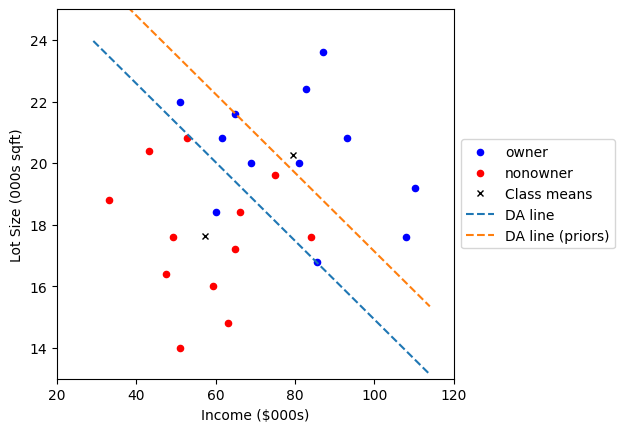

In [12]:
ax = mower_df[mower_df.Ownership=='Owner'].plot.scatter(x='Income', y='Lot_Size', c='blue', label='owner')
mower_df[mower_df.Ownership!='Owner'].plot.scatter(x='Income', y='Lot_Size', c='red', label='nonowner', ax=ax)

ax.plot(da_reg.means_[:,0], da_reg.means_[:,1], 'x', color='black', label='Class means', markersize=5)

# Determine the class separation line for the model with priors:
# The coefficients and intercept are extracted from the model that was trained 
# with priors and therefore require no correction for the distortion
x_lda_prior = np.array(ax.get_xlim())
y_lda_prior = (- intercept_prior - c_income_prior * x_lda_prior) / c_lotSize_prior

ax.plot(x_lda, y_lda, '--', label='DA line')
ax.plot(x_lda_prior, y_lda_prior, '--', label='DA line (priors)')
ax.set_xlabel('Income ($000s)')
ax.set_ylabel('Lot Size (000s sqft)')
ax.set_xlim(20, 120)
ax.set_ylim(13, 25)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

## Figure 12.2

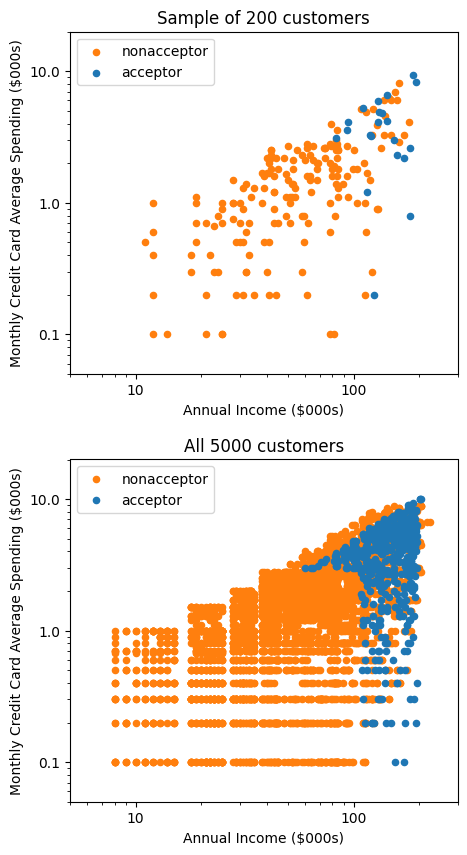

In [13]:
from matplotlib.lines import Line2D
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

universal_df = dmba.load_data('UniversalBank.csv')

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=[5, 10])
plt.subplots_adjust(hspace=0.25)
# plt.tight_layout()

def createGraph(df, title, ax):
    ccIdx = df[df['Personal Loan'] == 0].index
    df.loc[ccIdx].plot(x='Income', y='CCAvg', kind='scatter',
                              label='nonacceptor', color='C1',
                              ylim = (0.05, 20), xlim = (5, 300),
                              logx=True, logy=True, ax=ax)
    df.drop(ccIdx).plot(x='Income', y='CCAvg', kind='scatter',
                              label='acceptor', color='C0',
                              ylim = (0.05, 20), xlim = (5, 300),
                              logx=True, logy=True, ax=ax)
    ax.set_xlabel('Annual Income ($000s)')
    ax.set_ylabel('Monthly Credit Card Average Spending ($000s)')
    ax.xaxis.set_major_formatter(ScalarFormatter())
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    ax.set_title(title)
createGraph(universal_df.sample(200, random_state=10), 'Sample of 200 customers', axes[0])
createGraph(universal_df, 'All 5000 customers', axes[1])
plt.savefig(str(FIGURES / 'PersonalLoanSample.pdf'))
plt.show()

In [14]:
universal_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [15]:
universal_df.shape

(5000, 14)